<a href="https://colab.research.google.com/github/aishwaryabejugam18/ML-Workshop/blob/main/optimize_and_save_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Negative Mean Squared Error: -0.0011270371126228262


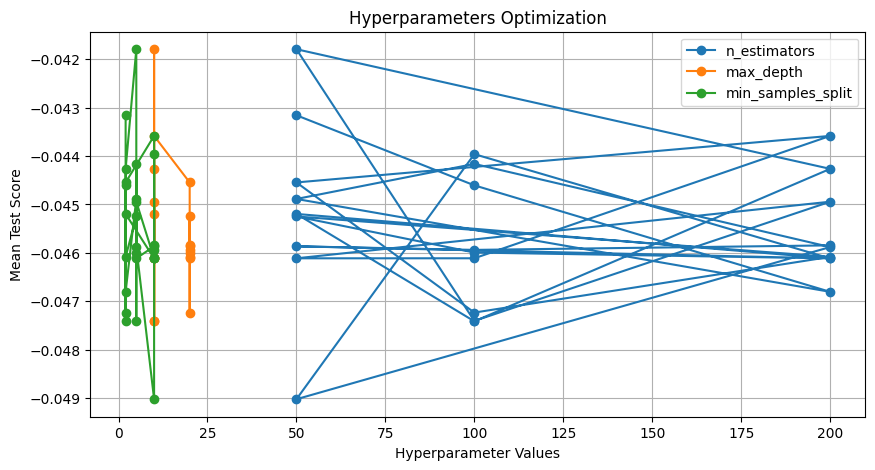

['best_model.pkl']

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, make_scorer
import joblib

# Load dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model
model = RandomForestRegressor()

# Define hyperparameters grid
param_grid = {
    'n_estimators': [50, 100, 200],   #number of trees in random forest
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# Define GridSearchCV
scoring = make_scorer(mean_squared_error, greater_is_better=False) ##based on mse
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring=scoring) ##search the grid with model,grid hyperparameters, cross validation folds=5


# Fit GridSearchCV
grid_search.fit(X_train, y_train) ##train and evaluate using diff combinations

# Get the best model
best_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_model.predict(X_test)

# Evaluate the model
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
neg_mse = -mse  # Negative mean squared error
print("Negative Mean Squared Error:", neg_mse)

# Visualize hyperparameters performance
results = grid_search.cv_results_
params = results['params']
mean_test_score = results['mean_test_score']

plt.figure(figsize=(10, 5))
for i, param in enumerate(param_grid.keys()):
    values = [x[param] for x in params]
    plt.plot(values, mean_test_score, marker='o', label=param)

plt.xlabel('Hyperparameter Values')
plt.ylabel('Mean Test Score')
plt.title('Hyperparameters Optimization')
plt.legend()
plt.grid(True)
plt.show()

# Save the best model to disk
joblib.dump(best_model, 'best_model.pkl')